In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import sparse
import seaborn as sns
import sys
import os
import math
import time
import random
import warnings
import ast
warnings.filterwarnings("ignore")

"append parent directory so that we can import sibling module"

parent_dir = os.path.dirname(os.path.abspath('.'))
sys.path.append(parent_dir)

from utils.eda_utils import *

In [2]:
movies = pd.read_csv('../data/movies.csv')
movies.head(2)

,adult,budget,genres,id,imdb_id,original_language,original_title,overview,popularity,production_companies,...,release_date,revenue,spoken_languages,title,video,vote_average,vote_count,cast,crew,keywords
0,False,30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,"[{'name': 'Pixar Animation Studios', 'id': 3}]",...,1995-10-30,373554033.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Toy Story,False,7.7,5415.0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...","[{'id': 931, 'name': 'jealousy'}, {'id': 4290,..."
1,False,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...",...,1995-12-15,262797249.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Jumanji,False,6.9,2413.0,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...","[{'id': 10090, 'name': 'board game'}, {'id': 1..."


In [3]:
movies.columns

Index(['adult', 'budget', 'genres', 'id', 'imdb_id', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'spoken_languages',
       'title', 'video', 'vote_average', 'vote_count', 'cast', 'crew',
       'keywords'],
      dtype='object')

In [8]:
movies['cast'] = movies['cast'].map(ast.literal_eval)
movies['crew'] = movies['crew'].map(ast.literal_eval)
movies['genres'] = movies['genres'].map(ast.literal_eval)
movies['keywords'] = movies['keywords'].map(ast.literal_eval)

movies['production_companies'].fillna('[]', inplace=True)
movies['production_companies'] = movies['production_companies'].map(ast.literal_eval)

movies['spoken_languages'].fillna('[]', inplace=True)
movies['spoken_languages'] = movies['spoken_languages'].map(ast.literal_eval)

# Preprocessing metadata

### 1. Adult

In [4]:
movies['adult'].unique()

array([False,  True])

In [5]:
movies['adult'].isna().sum()

0

In [7]:
movies['adult'].value_counts()

False    45453
True         9
Name: adult, dtype: int64

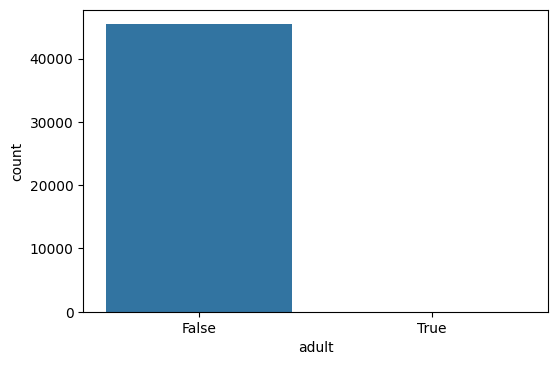

In [6]:
countplot(movies['adult'], plt, sns)

### 2. Budget 

In [10]:
movies['budget'].isna().sum()

0

In [12]:
len(movies[movies['budget']==0]), movies.shape

(36572, (45462, 21))

In [14]:
movies[movies['budget']!=0]['budget'].describe()

count    8.890000e+03
mean     2.160428e+07
std      3.431063e+07
min      1.000000e+00
25%      2.000000e+06
50%      8.000000e+06
75%      2.500000e+07
max      3.800000e+08
Name: budget, dtype: float64

In [15]:
movies[movies['budget']==3.800000e+08]

,adult,budget,genres,id,imdb_id,original_language,original_title,overview,popularity,production_companies,...,release_date,revenue,spoken_languages,title,video,vote_average,vote_count,cast,crew,keywords
17124,False,380000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",1865,tt1298650,en,Pirates of the Caribbean: On Stranger Tides,Captain Jack Sparrow crosses paths with a woma...,27.88772,"[{'name': 'Walt Disney Pictures', 'id': 2}, {'...",...,2011-05-14,1.045714e+09,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Pirates of the Caribbean: On Stranger Tides,False,6.4,5068.0,"[{'cast_id': 15, 'character': 'Captain Jack Sp...","[{'credit_id': '566b4f54c3a3683f56005151', 'de...","[{'id': 658, 'name': 'sea'}, {'id': 1316, 'nam..."


### 3. Genres

In [22]:
movies['genres'] = movies['genres'].map(lambda genres: [g['name'] for g in genres])

In [26]:
flatten_genres = pd.Series(np.concatenate(movies['genres']))

In [28]:
flatten_genres.value_counts()

Drama              20265
Comedy             13182
Thriller            7624
Romance             6735
Action              6596
Horror              4673
Crime               4307
Documentary         3932
Adventure           3496
Science Fiction     3049
Family              2770
Mystery             2467
Fantasy             2313
Animation           1935
Foreign             1622
Music               1598
History             1398
War                 1323
Western             1042
TV Movie             767
dtype: int64

In [37]:
set_size(plt, 15)

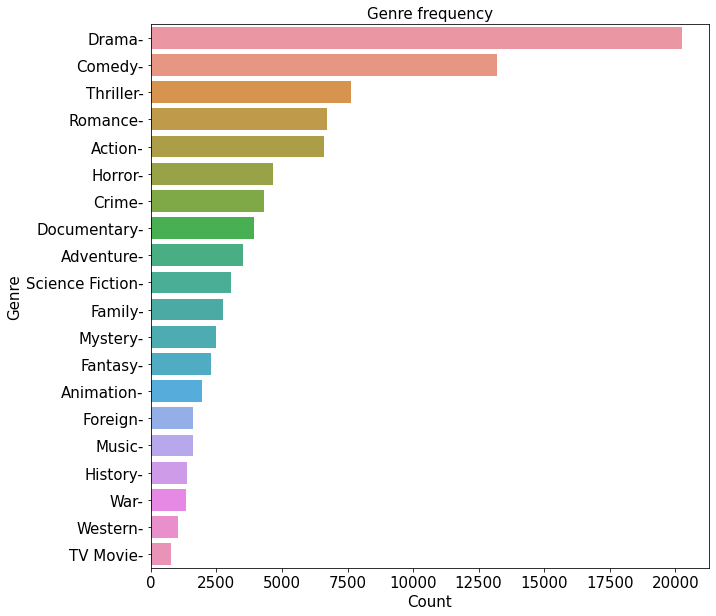

In [39]:
top_frequency(flatten_genres, plt, sns, "Count", "Genre", "Genre frequency", figsize=(10, 10))

### 4. Original language

In [40]:
movies['original_language'].unique()

array(['en', 'fr', 'zh', 'it', 'fa', 'nl', 'de', 'cn', 'ar', 'es', 'ru',
       'sv', 'ja', 'ko', 'sr', 'bn', 'he', 'pt', 'wo', 'ro', 'hu', 'cy',
       'vi', 'cs', 'da', 'no', 'nb', 'pl', 'el', 'sh', 'xx', 'mk', 'bo',
       'ca', 'fi', 'th', 'sk', 'bs', 'hi', 'tr', 'is', 'ps', 'ab', 'eo',
       'ka', 'mn', 'bm', 'zu', 'uk', 'af', 'la', 'et', 'ku', 'fy', 'lv',
       'ta', 'sl', 'tl', 'ur', 'rw', 'id', 'bg', 'mr', 'lt', 'kk', 'ms',
       'sq', nan, 'qu', 'te', 'am', 'jv', 'tg', 'ml', 'hr', 'lo', 'ay',
       'kn', 'eu', 'ne', 'pa', 'ky', 'gl', 'uz', 'sm', 'mt', 'hy', 'iu',
       'lb', 'si'], dtype=object)

In [43]:
movies['original_language'].value_counts().head(10)

en    32269
fr     2438
it     1529
ja     1350
de     1080
es      993
ru      826
hi      508
ko      444
zh      409
Name: original_language, dtype: int64

### 5. Overview

In [44]:
movies['overview'].head(3)

0    Led by Woody, Andy's toys live happily in his ...
1    When siblings Judy and Peter discover an encha...
2    A family wedding reignites the ancient feud be...
Name: overview, dtype: object

In [47]:
movies['overview'].isna().sum()

954

In [48]:
movies['overview'].fillna('', inplace=True)

In [50]:
movies['overview_length'] = movies['overview'].map(lambda x: len(x.split()))

In [51]:
movies['overview_length'].describe()

count    45462.000000
mean        53.957151
std         35.414330
min          0.000000
25%         26.000000
50%         47.000000
75%         72.000000
max        187.000000
Name: overview_length, dtype: float64

In [52]:
len(movies[movies['overview_length']==0])

959

### 6. Popularity

In [53]:
movies['popularity'].head()

0    21.946943
1    17.015539
2    11.712900
3     3.859495
4     8.387519
Name: popularity, dtype: float64

In [54]:
movies['popularity'].isna().sum()

3

In [55]:
len(movies[movies['popularity']==0])

66

In [58]:
movies['popularity'].fillna(0.0, inplace=True)

In [59]:
movies['popularity'].describe()

count    45462.000000
mean         2.921345
std          6.005316
min          0.000000
25%          0.385872
50%          1.127563
75%          3.678685
max        547.488298
Name: popularity, dtype: float64

### 7. Production companies

In [60]:
movies['production_companies'].head()

0       [{'name': 'Pixar Animation Studios', 'id': 3}]
1    [{'name': 'TriStar Pictures', 'id': 559}, {'na...
2    [{'name': 'Warner Bros.', 'id': 6194}, {'name'...
3    [{'name': 'Twentieth Century Fox Film Corporat...
4    [{'name': 'Sandollar Productions', 'id': 5842}...
Name: production_companies, dtype: object

In [61]:
movies['production_companies'] = movies['production_companies'].map(lambda comp: [c['name'] for c in comp])

In [62]:
movies['production_companies'].head()

0                            [Pixar Animation Studios]
1    [TriStar Pictures, Teitler Film, Interscope Co...
2                       [Warner Bros., Lancaster Gate]
3             [Twentieth Century Fox Film Corporation]
4         [Sandollar Productions, Touchstone Pictures]
Name: production_companies, dtype: object

In [63]:
flatten_companies = pd.Series(np.concatenate(movies['production_companies']))

In [65]:
flatten_companies.value_counts()

Warner Bros.                              1250
Metro-Goldwyn-Mayer (MGM)                 1076
Paramount Pictures                        1003
Twentieth Century Fox Film Corporation     836
Universal Pictures                         830
                                          ... 
P-R Productions Picture                      1
LeGrand Productions                          1
Gemini Industries                            1
Historias Cinematográficas                   1
J.B.J Film                                   1
Length: 23537, dtype: int64

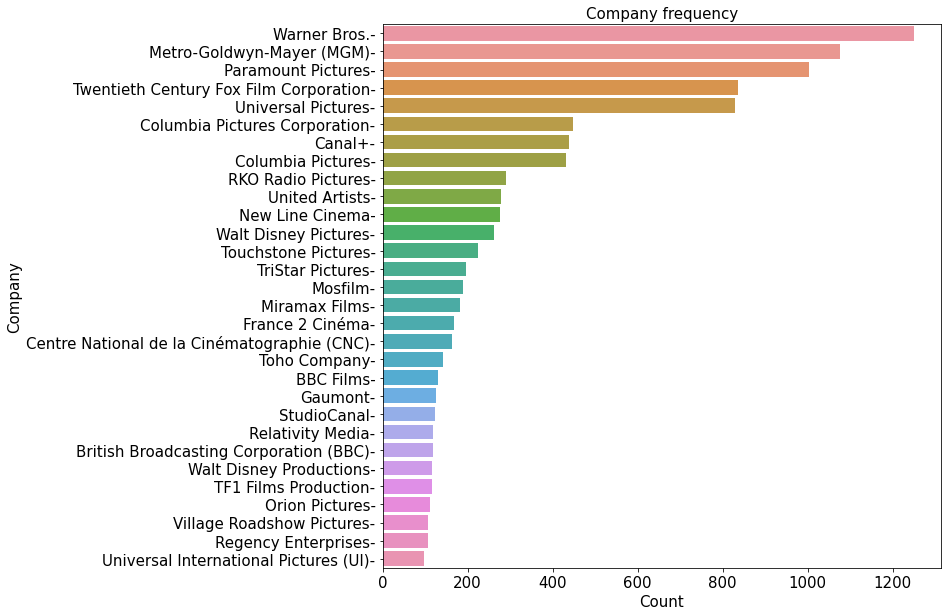

In [66]:
top_frequency(flatten_companies, plt, sns, "Count", "Company", "Company frequency", figsize=(10, 10))

### 8. Revenue

In [67]:
movies['revenue'].isna().sum()

3

In [68]:
len(movies[movies['revenue']==0]), movies.shape

(38051, (45462, 22))

In [69]:
movies[movies['revenue']!=0]['revenue'].describe()

count    7.408000e+03
mean     6.878739e+07
std      1.464203e+08
min      1.000000e+00
25%      2.400000e+06
50%      1.682272e+07
75%      6.722707e+07
max      2.787965e+09
Name: revenue, dtype: float64

### 9. Vote average

In [73]:
movies['vote_average'].head()

0    7.7
1    6.9
2    6.5
3    6.1
4    5.7
Name: vote_average, dtype: float64

In [74]:
movies['vote_average'].isna().sum()

3

In [78]:
movies['vote_average'].fillna(0, inplace=True)

In [79]:
len(movies[movies['vote_average']==0]), movies.shape

(3000, (45462, 22))

In [80]:
movies[movies['vote_average']!=0]['vote_average'].describe()

count    42462.000000
mean         6.014877
std          1.256208
min          0.500000
25%          5.300000
50%          6.100000
75%          6.900000
max         10.000000
Name: vote_average, dtype: float64

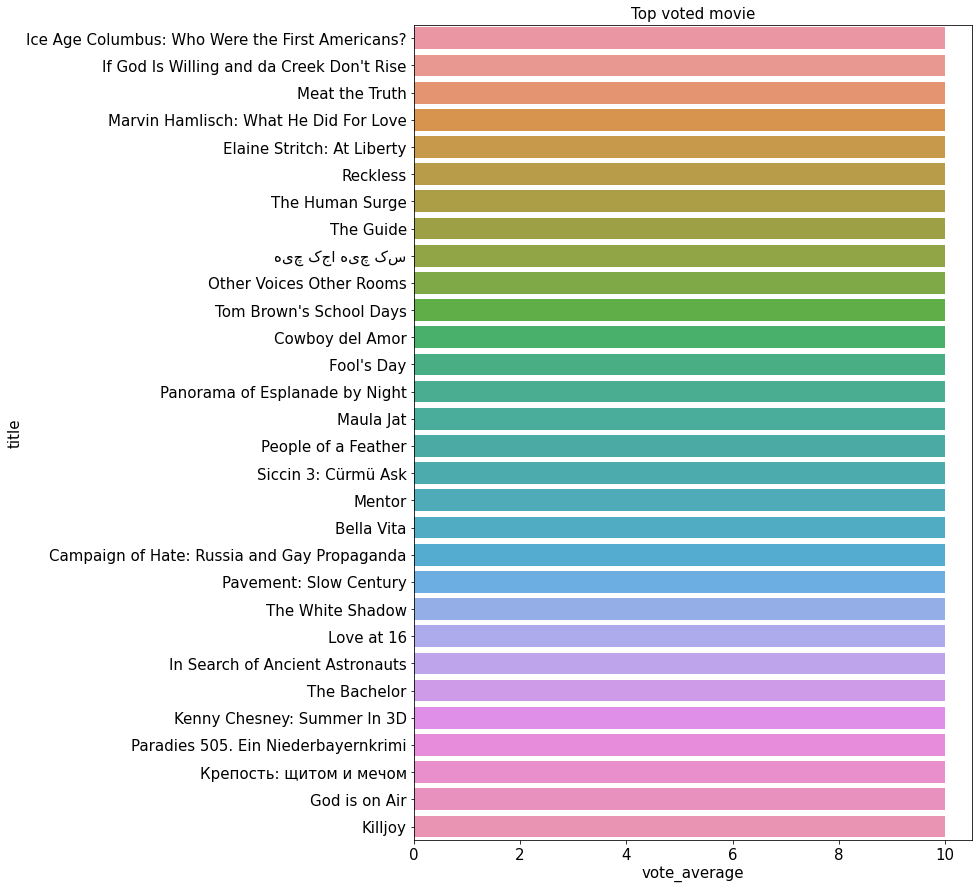

In [104]:
most_voted_avg_movies = movies.sort_values(['vote_average'], ascending=False)
plt.figure(figsize=(10, 15))
plt.title('Top voted movie')
plt.ylabel("Vote point")
plt.xlabel("Movie")
sns.barplot(x='vote_average', y='title',data=most_voted_avg_movies[:30],orient='h');

In [81]:
movies['round_vote_avg'] = movies['vote_average'].map(round)

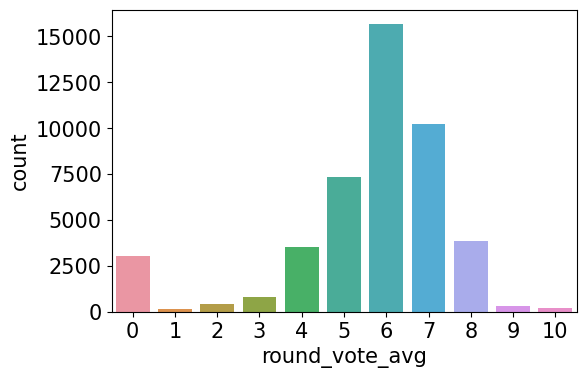

In [82]:
countplot(movies['round_vote_avg'], plt, sns)

### 10. Vote count

In [83]:
movies['vote_count'].head()

0    5415.0
1    2413.0
2      92.0
3      34.0
4     173.0
Name: vote_count, dtype: float64

In [84]:
movies['vote_count'].isna().sum()

3

In [85]:
movies['vote_count'].fillna(0, inplace=True)

In [86]:
len(movies[movies['vote_count']==0]), movies.shape

(2901, (45462, 23))

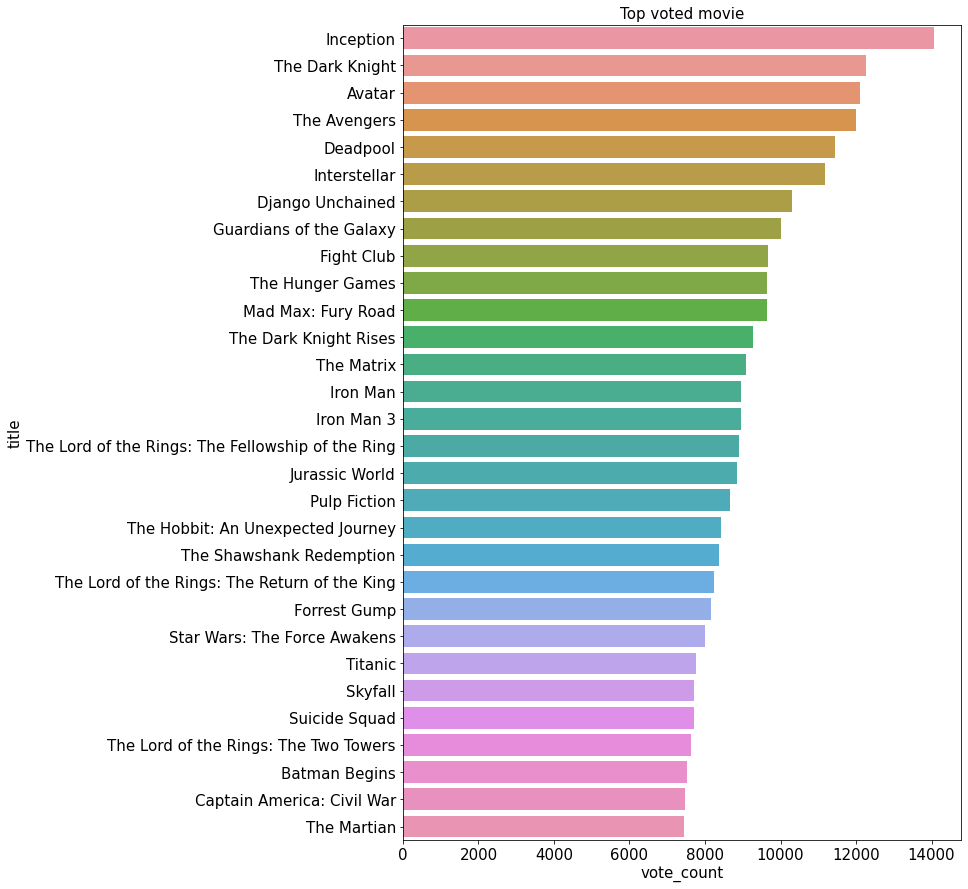

In [103]:
most_voted_movies = movies.sort_values(['vote_count'], ascending=False)
plt.figure(figsize=(10, 15))
plt.title('Top voted movie')
plt.ylabel("Vote count")
plt.xlabel("Movie")
sns.barplot(x='vote_count',y='title',data=most_voted_movies[:30],orient='h');

### 11. Cast

In [105]:
movies['cast'].head()

0    [{'cast_id': 14, 'character': 'Woody (voice)',...
1    [{'cast_id': 1, 'character': 'Alan Parrish', '...
2    [{'cast_id': 2, 'character': 'Max Goldman', 'c...
3    [{'cast_id': 1, 'character': 'Savannah 'Vannah...
4    [{'cast_id': 1, 'character': 'George Banks', '...
Name: cast, dtype: object

In [107]:
movies['cast'] = movies['cast'].map(lambda cast: [c['name'] for c in cast])

In [110]:
flatten_casts = pd.Series(np.concatenate(movies['cast']))
flatten_casts.value_counts()

Bess Flowers            241
Christopher Lee         148
John Wayne              125
Samuel L. Jackson       123
Michael Caine           110
                       ... 
Sorrell Brooke            1
Victoria Larriveu         1
Philippe Giblin           1
Thomas Gräßle             1
Brandon Scott Miller      1
Length: 202747, dtype: int64

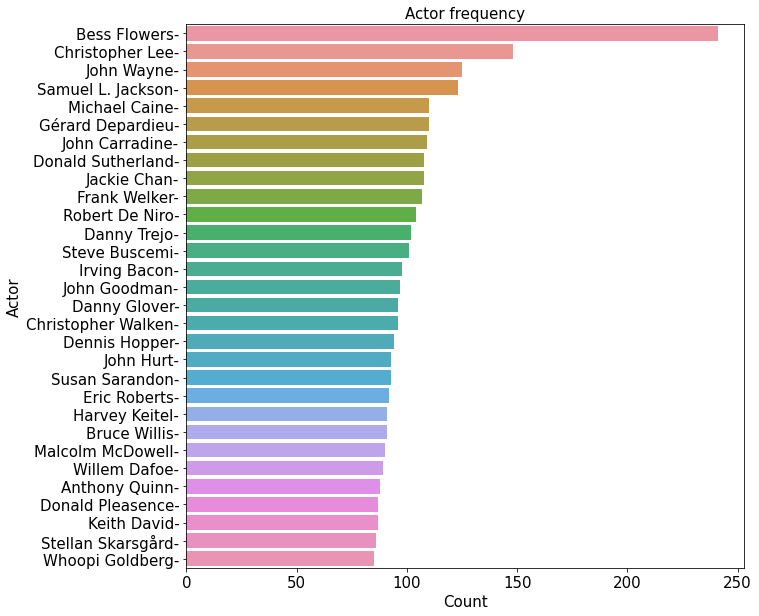

In [112]:
top_frequency(flatten_casts, plt, sns, "Count", "Actor", "Actor frequency", figsize=(10, 10))

### 12. Keywords

In [113]:
movies['keywords'].head()

0    [{'id': 931, 'name': 'jealousy'}, {'id': 4290,...
1    [{'id': 10090, 'name': 'board game'}, {'id': 1...
2    [{'id': 1495, 'name': 'fishing'}, {'id': 12392...
3    [{'id': 818, 'name': 'based on novel'}, {'id':...
4    [{'id': 1009, 'name': 'baby'}, {'id': 1599, 'n...
Name: keywords, dtype: object

In [114]:
movies['keywords'] = movies['keywords'].map(lambda keywords: [key['name'] for key in keywords])

In [115]:
flatten_keywords = pd.Series(np.concatenate(movies['keywords']))
flatten_keywords.value_counts()

woman director       3041
independent film     1916
murder               1286
based on novel        823
musical               726
                     ... 
multiple felonies       1
brechtian theatre       1
fouke monster           1
ska                     1
social security         1
Length: 19956, dtype: int64

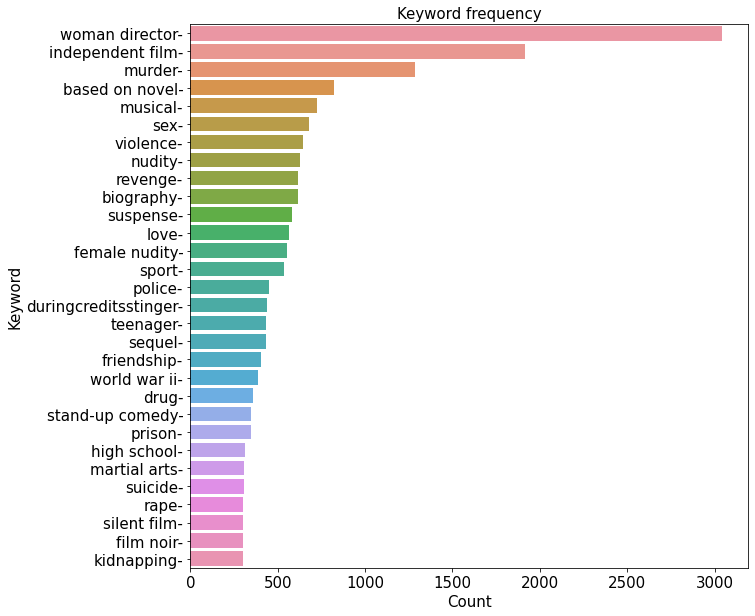

In [116]:
top_frequency(flatten_keywords, plt, sns, "Count", "Keyword", "Keyword frequency", figsize=(10, 10))

In [9]:
movies.columns

Index(['adult', 'budget', 'genres', 'id', 'imdb_id', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'spoken_languages',
       'title', 'video', 'vote_average', 'vote_count', 'cast', 'crew',
       'keywords'],
      dtype='object')

In [117]:
movies.head(3)

,adult,budget,genres,id,imdb_id,original_language,original_title,overview,popularity,production_companies,...,spoken_languages,title,video,vote_average,vote_count,cast,crew,keywords,overview_length,round_vote_avg
0,False,30000000,"[Animation, Comedy, Family]",862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,[Pixar Animation Studios],...,"[{'iso_639_1': 'en', 'name': 'English'}]",Toy Story,False,7.7,5415.0,"[Tom Hanks, Tim Allen, Don Rickles, Jim Varney...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...","[jealousy, toy, boy, friendship, friends, riva...",50,8
1,False,65000000,"[Adventure, Fantasy, Family]",8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,"[TriStar Pictures, Teitler Film, Interscope Co...",...,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Jumanji,False,6.9,2413.0,"[Robin Williams, Jonathan Hyde, Kirsten Dunst,...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...","[board game, disappearance, based on children'...",67,7
2,False,0,"[Romance, Comedy]",15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.712900,"[Warner Bros., Lancaster Gate]",...,"[{'iso_639_1': 'en', 'name': 'English'}]",Grumpier Old Men,False,6.5,92.0,"[Walter Matthau, Jack Lemmon, Ann-Margret, Sop...","[{'credit_id': '52fe466a9251416c75077a89', 'de...","[fishing, best friend, duringcreditsstinger, o...",56,6


### 13. Spoken Languages

In [118]:
movies['spoken_languages'].head(3)

0             [{'iso_639_1': 'en', 'name': 'English'}]
1    [{'iso_639_1': 'en', 'name': 'English'}, {'iso...
2             [{'iso_639_1': 'en', 'name': 'English'}]
Name: spoken_languages, dtype: object

In [119]:
movies['spoken_languages'] = movies['spoken_languages'].map(lambda languages: [lang['name'] for lang in languages])

In [120]:
flatten_spoken_languages = pd.Series(np.concatenate(movies['spoken_languages']))
flatten_spoken_languages.value_counts()

English            28745
Français            4196
Deutsch             2625
Español             2413
Italiano            2367
                   ...  
Malti                  3
ozbek                  2
беларуская мова        2
Fulfulde               2
Hausa                  1
Length: 75, dtype: int64

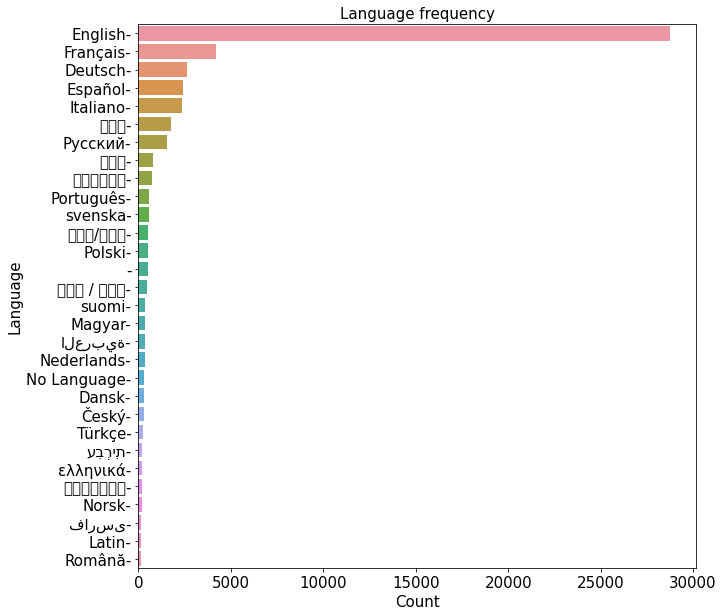

In [121]:
top_frequency(flatten_spoken_languages, plt, sns, "Count", "Language", "Language frequency", figsize=(10, 10))

In [126]:
movies.to_csv('../data/processed_movies.csv', index=False, columns=['budget',
                                                                    'genres',
                                                                    'id',
                                                                    'original_language',
                                                                    'overview',
                                                                    'popularity',
                                                                    'production_companies',
                                                                    'revenue',
                                                                    'spoken_languages',
                                                                    'title',
                                                                    'vote_average',
                                                                    'vote_count',
                                                                    'cast',
                                                                    'keywords'])

# Interesting metadata

In [3]:
movies = pd.read_csv('../data/processed_movies.csv')

movies.rename(columns={"id": "tmdbId"}, inplace=True)

movies['genres'] = movies['genres'].map(ast.literal_eval)
movies['production_companies'] = movies['production_companies'].map(ast.literal_eval)
movies['spoken_languages'] = movies['spoken_languages'].map(ast.literal_eval)
movies['cast'] = movies['cast'].map(ast.literal_eval)
movies['keywords'] = movies['keywords'].map(ast.literal_eval)


movies.head(2)

,budget,genres,tmdbId,original_language,overview,popularity,production_companies,revenue,spoken_languages,title,vote_average,vote_count,cast,keywords
0,30000000,"[Animation, Comedy, Family]",862,en,"Led by Woody, Andy's toys live happily in his ...",21.946943,[Pixar Animation Studios],373554033.0,[English],Toy Story,7.7,5415.0,"[Tom Hanks, Tim Allen, Don Rickles, Jim Varney...","[jealousy, toy, boy, friendship, friends, riva..."
1,65000000,"[Adventure, Fantasy, Family]",8844,en,When siblings Judy and Peter discover an encha...,17.015539,"[TriStar Pictures, Teitler Film, Interscope Co...",262797249.0,"[English, Français]",Jumanji,6.9,2413.0,"[Robin Williams, Jonathan Hyde, Kirsten Dunst,...","[board game, disappearance, based on children'..."


In [4]:
links = pd.read_csv('../data/links.csv')
links.drop_duplicates('tmdbId', inplace=True)
links.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [5]:
movies.shape, links.shape

((45462, 14), (45595, 3))

In [6]:
movies = movies.merge(links, how='left', on='tmdbId')
movies.shape

(45462, 16)

In [10]:
movies['overview'].fillna('', inplace=True)
movies['overview_length'] = movies['overview'].map(lambda x : len(x.split()))
movies['genres_length'] = movies['genres'].map(len)

In [11]:
movies = movies[(movies['overview_length'] >= 8) & (movies['genres_length'] >= 1)]
movies.shape

(41999, 18)

In [13]:
movies.head(1)

,budget,genres,tmdbId,original_language,overview,popularity,production_companies,revenue,spoken_languages,title,vote_average,vote_count,cast,keywords,movieId,imdbId,overview_length,genres_length
0,30000000,"[Animation, Comedy, Family]",862,en,"Led by Woody, Andy's toys live happily in his ...",21.946943,[Pixar Animation Studios],373554033.0,[English],Toy Story,7.7,5415.0,"[Tom Hanks, Tim Allen, Don Rickles, Jim Varney...","[jealousy, toy, boy, friendship, friends, riva...",1,114709,50,3


In [15]:
movies.to_csv('../data/movies_w_description.csv', index=False, columns=['movieId',
                                                                        'overview',
                                                                        'genres',
                                                                        'title',
                                                                        'keywords'])

In [14]:
movies.shape

(41999, 18)

In [13]:
unique_sid = list()
with open('../data/processed/4_5_5_False_15000/unique_sid.txt', 'r') as f:
    for line in f:
        unique_sid.append(int(line.strip()))
        
len(unique_sid)

17888

In [18]:
movies['tmdbId'] = movies['tmdbId'].astype(int)

In [20]:
selected_movies = movies[movies['movieId'].isin(unique_sid)]
selected_movies.shape

(17773, 17)

In [21]:
17888 - 17773

115

In [ ]:
df.loc[(df['column_name'] >= A) & (df['column_name'] <= B)]

In [24]:
len(movies[movies['overview_length']==0])

In [27]:
for i in range(10):
    print(i, len(movies[movies['overview_length']==i]))

0 959
1 4
2 26
3 146
4 44
5 54
6 70
7 79
8 122
9 168


In [30]:
movies[movies['overview_length']==8]

,budget,genres,id,original_language,overview,popularity,production_companies,revenue,spoken_languages,title,vote_average,vote_count,cast,keywords,tmdbId,movieId,imdbId,overview_length
137,0,[],124639,en,A subtle yet violent commentary on feudal lords.,0.001205,[],0.0,[],Target,0.0,0.0,[],[],124639,139,114618,8
5123,0,[Foreign],125764,en,A mysterious creature is killing a farmer's li...,0.058586,[],0.0,[English],In The Winter Dark,6.5,1.0,"[Brenda Blethyn, Ray Barrett, Richard Roxburgh...",[],125764,5257,123114,8
6414,0,"[Drama, Music]",24356,en,"Amidst unrest, organizers put on a benefit con...",2.524264,"[BBC Films, Intermedia Films]",0.0,[English],Masked and Anonymous,5.2,13.0,"[Bob Dylan, Jeff Bridges, Penélope Cruz, John ...","[journalist, musical, concert, independent film]",24356,6563,319829,8
6622,0,[Comedy],18113,en,Chaos and misunderstandings ensue in a coed dorm,4.640429,[National Lampoon Productions],0.0,[English],National Lampoon Presents Dorm Daze,4.6,34.0,"[Tatyana Ali, Boti Bliss, Gable Carr, Patrick ...","[gay, prostitute, college, dormitory, mistaken...",18113,6771,362511,8
6813,0,[],158413,en,Documentary account of George W. Bush's presid...,0.202712,[],0.0,[],Journeys with George,8.0,1.0,[George W. Bush],[],158413,6965,312848,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44713,0,[Comedy],127098,fr,Pioneer filmmaker Georges Méliès performs his ...,0.141611,[Star Film Company],0.0,[],Extraordinary Illusions,4.8,4.0,[Georges Méliès],[illusionist],127098,174167,223509,8
44724,0,[],196491,fr,"Magical flowery frolics, similar to a Melies f...",0.073093,[],0.0,[],Les tulipes,4.5,2.0,[],[],196491,174203,173368,8
44859,0,[Comedy],17630,fr,They call her ugly. She's gonna act ugly.,3.841513,[Karé Productions],0.0,[Français],Ugly Melanie,5.6,74.0,"[Marilou Berry, Frédérique Bel, Chantal Lauby,...",[],17630,174629,1132608,8
45045,0,[Drama],260969,ru,Drama film about different lifes of twin broth...,0.102196,[Mosfilm],0.0,[Pусский],Kerosene Salesman's Wife,7.0,2.0,"[Vytautas Paukste, Aleksandr Baluev, Sergey Ve...",[],260969,175287,96503,8


# Fine tuning movie description with BERT

In [10]:
movies = pd.read_csv('../data/movies_w_description.csv')
movies.drop_duplicates('movieId', inplace=True)
movies['genres'] = movies['genres'].map(ast.literal_eval)
movies['keywords'] = movies['keywords'].map(ast.literal_eval)
movies.head(2)

,movieId,overview,genres,title,keywords
0,1,"Led by Woody, Andy's toys live happily in his ...","[Animation, Comedy, Family]",Toy Story,"[jealousy, toy, boy, friendship, friends, riva..."
1,2,When siblings Judy and Peter discover an encha...,"[Adventure, Fantasy, Family]",Jumanji,"[board game, disappearance, based on children'..."


In [11]:
movies.shape

(41969, 5)

In [13]:
unique_sid = list()
with open('../data/processed/4_5_5_False_15000/unique_sid.txt', 'r') as f:
    for line in f:
        unique_sid.append(int(line.strip()))
        
len(unique_sid)

17493

In [14]:
movies = movies[movies['movieId'].isin(unique_sid)]
movies.shape

(17493, 5)

In [ ]:
# [CLS][OVERVIEW][TOKEN][KEYWORDS]